In [84]:
import os
print(os.getcwd())  # Current working directory
print(os.listdir())  # Files in current directory



c:\Users\amirh\OneDrive\Documents\customer-churn\notebooks
['Customer_Churn.ipynb']


In [85]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

data_path = "../data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)

# Quick check
print(df.head())
print(df.shape)
print(df.info())



   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [86]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df = df.dropna().reset_index(drop=True)

# Drop customerID column
df = df.drop('customerID', axis=1)

X = df.drop("Churn", axis=1)
y = df["Churn"].map({'Yes': 1, 'No': 0})  # Convert target to numeric

numeric_features = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()


In [87]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])


In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [89]:
# Evaluate
accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Optional: detailed metrics
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.78
Confusion Matrix:
 [[921 112]
 [201 173]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.61      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



In [90]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1️⃣ Split data first (you already did this)
# X_train, X_test, y_train, y_test

# 2️⃣ Scale numeric features and encode categoricals
# Fit preprocessor only on training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 3️⃣ Apply SMOTE on training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

# 4️⃣ Train Random Forest on resampled data
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)
rf_model.fit(X_train_res, y_train_res)

# 5️⃣ Predict on the original test set
y_pred = rf_model.predict(X_test_processed)

# 6️⃣ Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7626154939587776
Confusion Matrix:
 [[819 214]
 [120 254]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1033
           1       0.54      0.68      0.60       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.78      0.76      0.77      1407



In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Preprocessing (reuse numeric & categorical features)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Logistic Regression pipeline
lr_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Train Logistic Regression
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7874911158493249
Confusion Matrix:
 [[915 118]
 [181 193]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [92]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Scale numeric features first for SMOTE
X_train_scaled = preprocessor.fit_transform(X_train)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_res, y_train_res)

X_test_scaled = preprocessor.transform(X_test)
y_pred = lr_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7405828002842928
Confusion Matrix:
 [[743 290]
 [ 75 299]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [102]:
import joblib
joblib.dump(model, "../models/churn_model.pkl")
print("Model saved to models/churn_model.pkl")


Model saved to models/churn_model.pkl


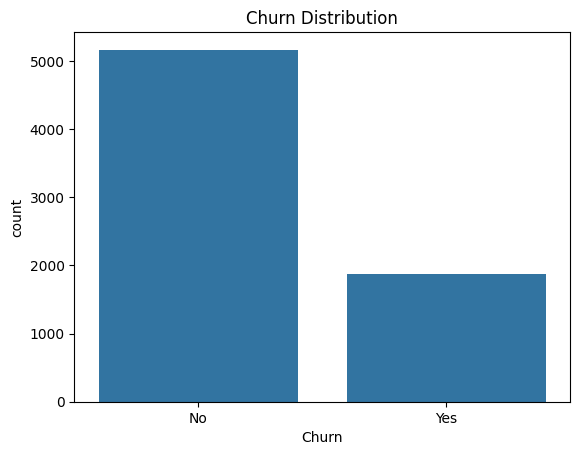

In [93]:
#Visualise churn distribution

import matplotlib.pyplot as plt
import seaborn as sns

#count how many customers churned vs stayed
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


the model will need special attention to avoid being biased toward predicting “no churn.” thats why we need to also look at precision,recall and f-1 score

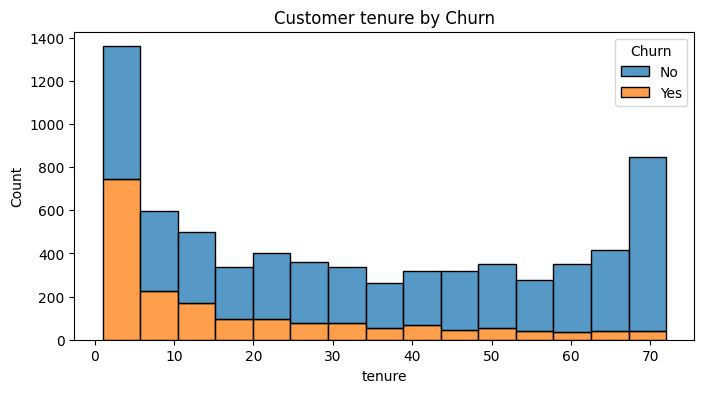

In [94]:
#plot tenure vs churn
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack') # draws histogram, shows stacked rather than overlap
plt.title('Customer tenure by Churn')
plt.show()



Most customers who churned have a short tenure (0–5 months). After that, the number of churned customers drops significantly, while most long-term customers remain.

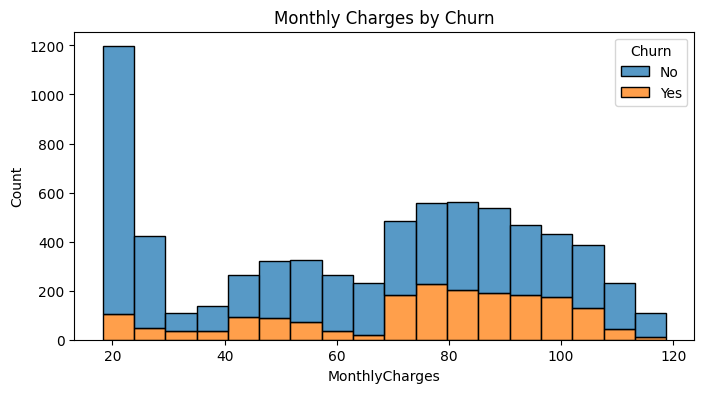

In [95]:
#plot monthly charges vs churn
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack')
plt.title('Monthly Charges by Churn')
plt.show()

patterns suggest that new customers and customers with mid-to-high monthly charges are more at risk of leaving, more stay at lower prices

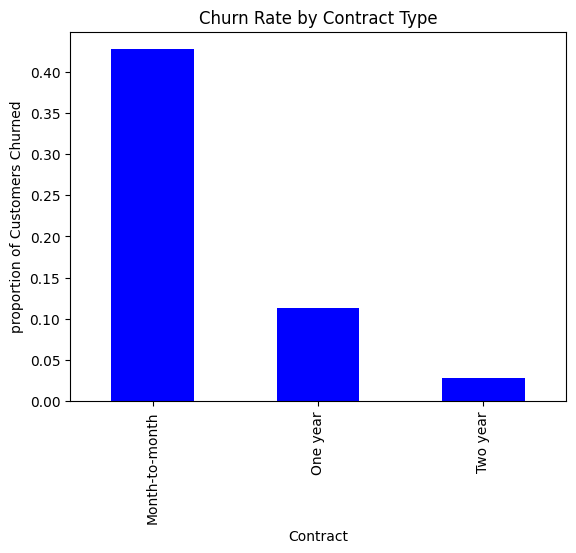

In [96]:
#churn rate by contract type
#calculates proportion of churned and non-churned customers for each contract type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() # reshapesd so sepeerate columns yes and no
contract_churn['Yes'].plot(kind='bar', color='blue')#draws bar chart
plt.title('Churn Rate by Contract Type')
plt.ylabel('proportion of Customers Churned')
plt.show()

month to month more customers churned, much lower with one year and two year. Longer commitments reduce likelihood of leaving

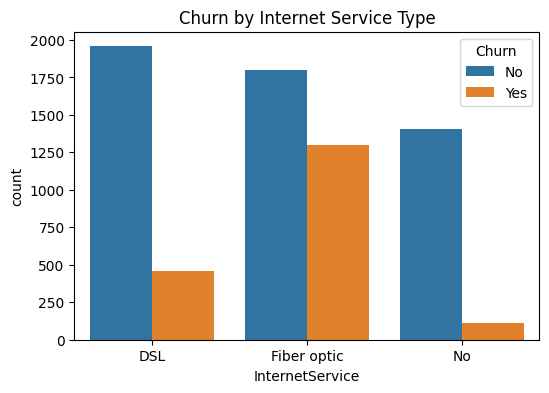

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of churn vs internet service
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='InternetService', hue='Churn') #counts number of customers in each service
plt.title('Churn by Internet Service Type')
plt.show()


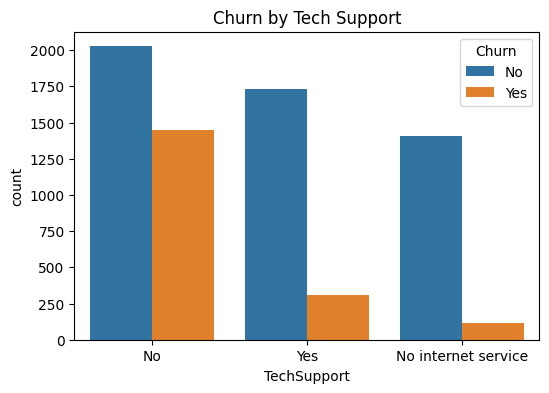

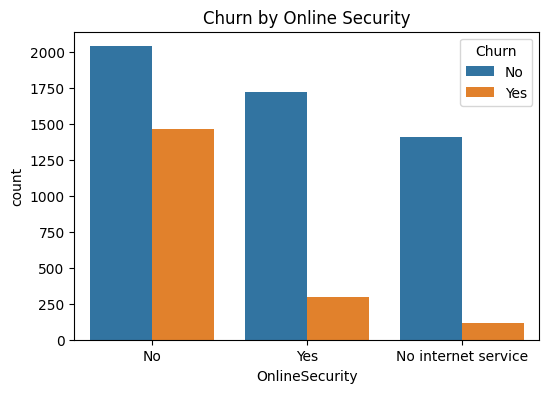

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# techSupport vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Churn by Tech Support')
plt.show()

# onlineSecurity vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title('Churn by Online Security')
plt.show()


both graphs show that customers without TechSupport or OnlineSecurity churn much more than those with it.

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.7875       0.73    0.70      0.71
1        Random Forest    0.7932       0.74    0.69      0.71
2    Gradient Boosting    0.7896       0.73    0.69      0.71
3  Tuned Random Forest    0.7953       0.74    0.70      0.71
4                SMOTE    0.7548       0.70    0.74      0.71


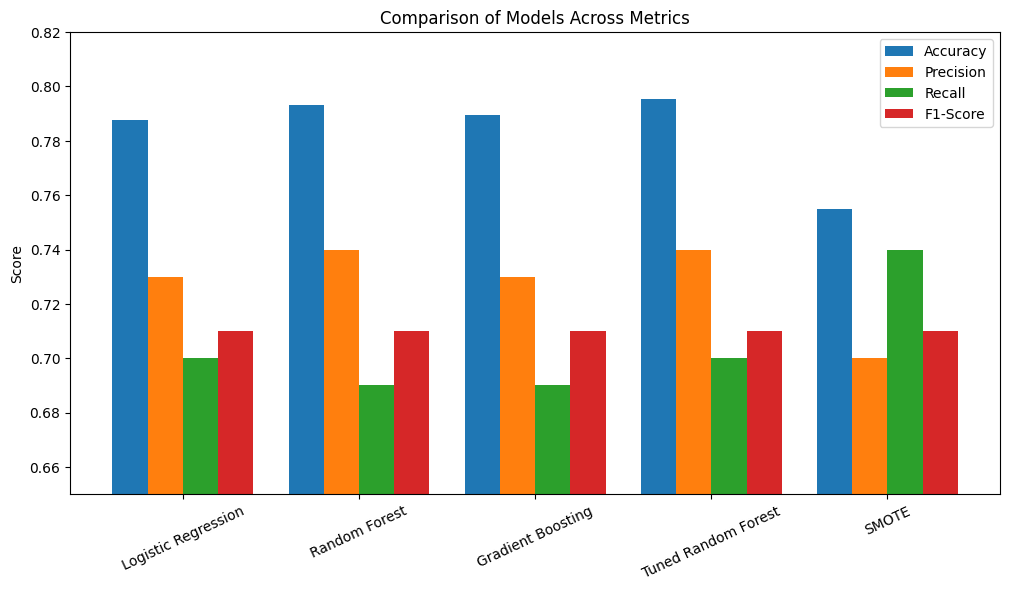

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model (from your outputs)
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Tuned Random Forest', 'SMOTE'],
    'Accuracy': [0.7875, 0.7932, 0.7896, 0.7953, 0.7548],
    'Precision': [0.73, 0.74, 0.73, 0.74, 0.70],
    'Recall': [0.70, 0.69, 0.69, 0.70, 0.74],
    'F1-Score': [0.71, 0.71, 0.71, 0.71, 0.71]
}

df_metrics = pd.DataFrame(data)
print(df_metrics)

# Plot grouped bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(data['Model']))  # label locations
width = 0.2

fig, ax = plt.subplots(figsize=(12,6))

for i, metric in enumerate(metrics):
    ax.bar(x + i*width - 0.3, df_metrics[metric], width, label=metric)

ax.set_xticks(x)
ax.set_xticklabels(df_metrics['Model'], rotation=25)
ax.set_ylim(0.65, 0.82)
ax.set_ylabel('Score')
ax.set_title('Comparison of Models Across Metrics')
ax.legend()
plt.show()



